In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

Creating the dumbest model to practice

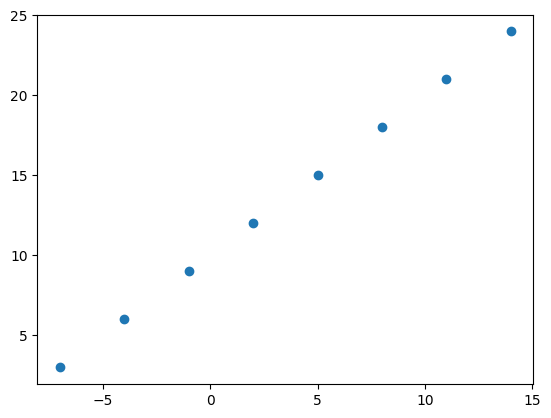

In [3]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 460ms/step - loss: 19.1722 - mae: 19.1722
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 18.8909 - mae: 18.8909
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 18.6097 - mae: 18.6097
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 18.3284 - mae: 18.3284
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 18.0472 - mae: 18.0472


In [5]:
model.predict([6])

1/1 [==============================] - 0s 129ms/step


array([[-5.7271094]], dtype=float32)

Improving a model


*   Add layers
*   Increase the number of hidden units
*   Change Activation/Optimization function or Learning Rate
*   Gather more data
*   Increase the training time




In [6]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

X, y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [7]:
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]
X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

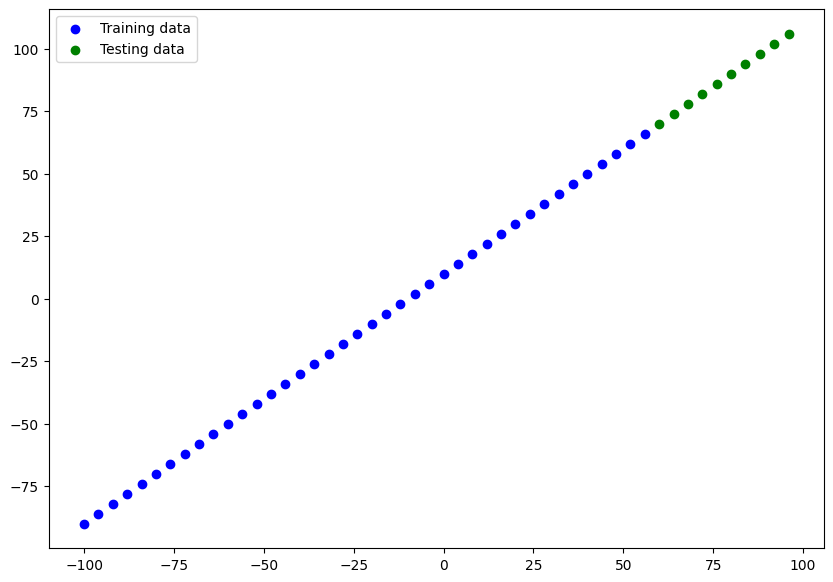

In [8]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X_train, y_train, epochs=100,verbose=0) # verbose controls how much gets output

In [10]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 40ms/step


**Visualize, Visualize, Visualize!**

Create a function to visualize all predictions easily

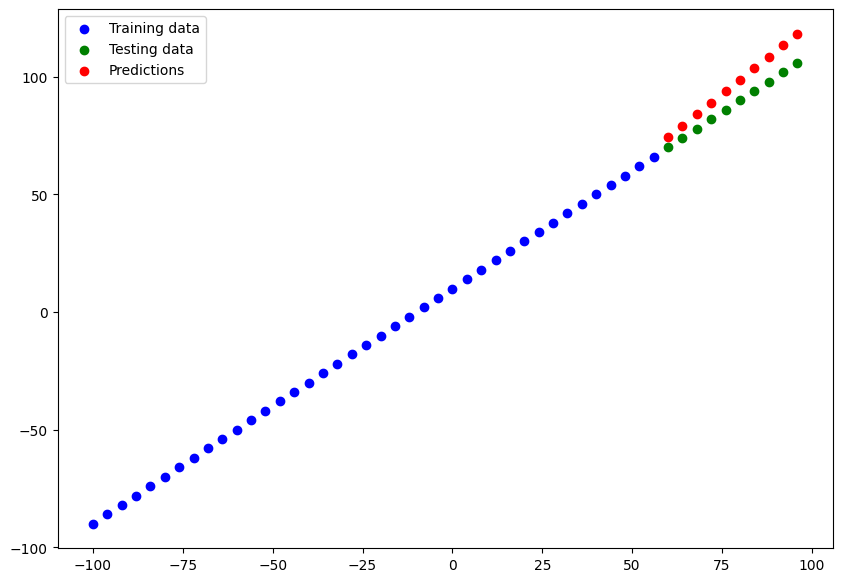

In [11]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

**Create functions for evaluation metrics**

In [12]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [13]:
# Calculate model metrics
mae_1 = mae(y_test, y_preds.squeeze()).numpy()
mse_1 = mse(y_test, y_preds.squeeze()).numpy()
mae_1, mse_1

(8.356313, 76.14719)

In [14]:
#Building model 2 with more layers

tf.random.set_seed(42)

# Replicate model and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 72ms/step


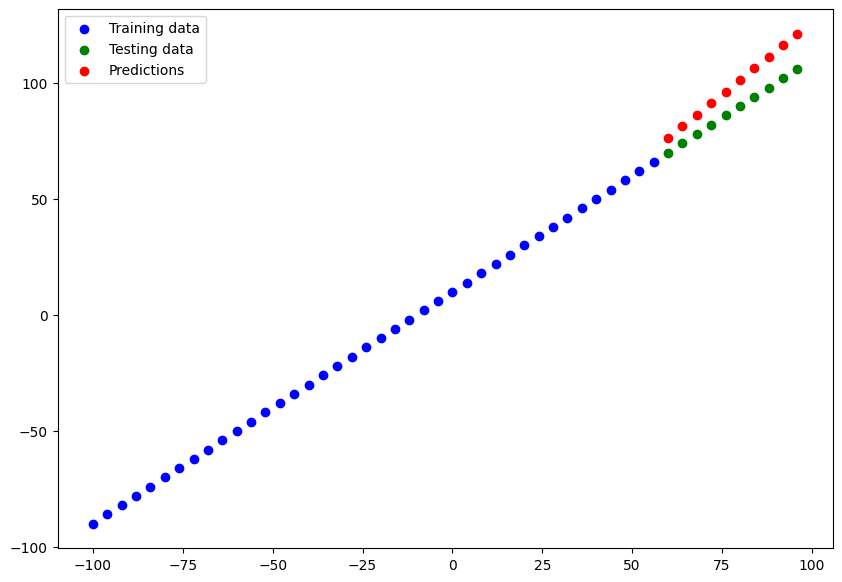

In [15]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [16]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(10.820669, 124.969154)

In [17]:
# Training model 3 with more epochs


tf.random.set_seed(42)
# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 112ms/step


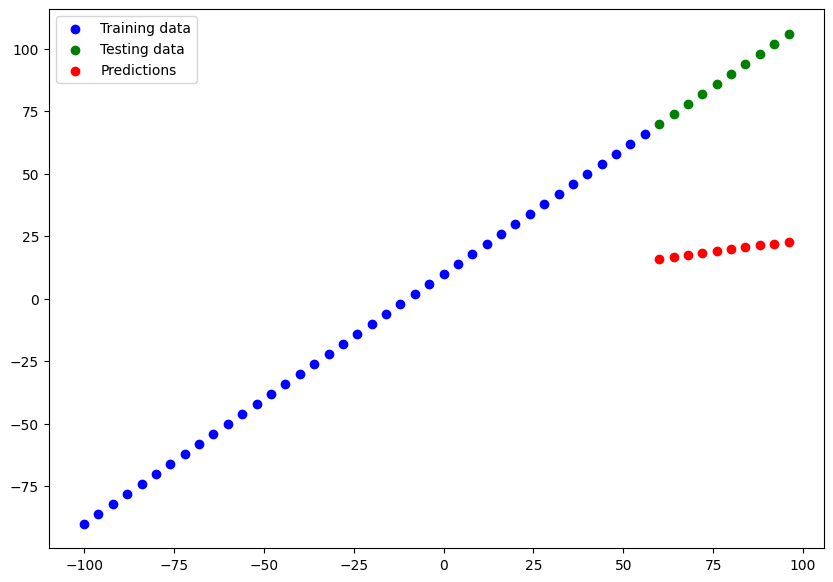

In [18]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [19]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.60045, 4792.255)

**We trained for longer but our model performed worse? As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).**

In [20]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 105ms/step


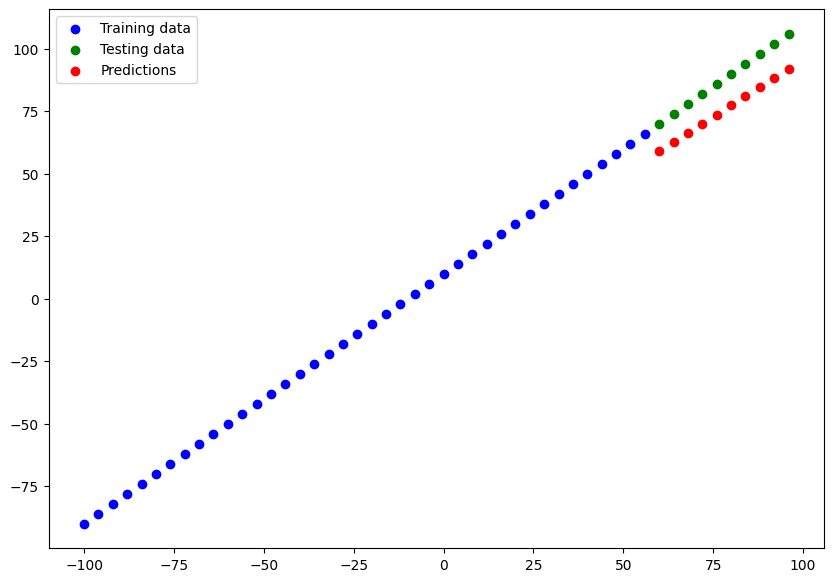

In [21]:
# Make and plot predictions for model_4
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [22]:
# Calculate model_4 metrics
mae_4 = mae(y_test, y_preds_4.squeeze()).numpy()
mse_4 = mse(y_test, y_preds_4.squeeze()).numpy()
mae_4, mse_4

(12.485459, 156.71158)

In [23]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mse'])

# Fit the model and save the history (we can plot this)
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 64ms/step


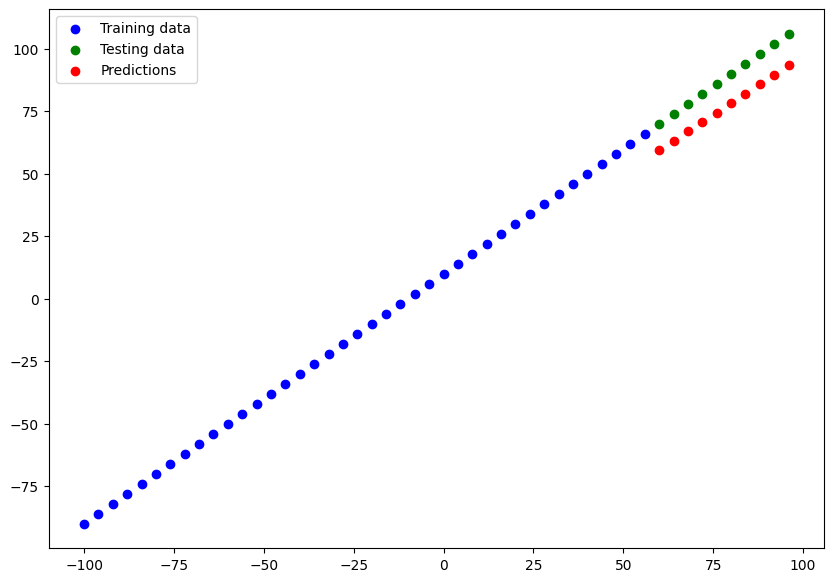

In [24]:
# Make and plot predictions for model_5
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [25]:
# Calculate model_5 metrics
mae_5 = mae(y_test, y_preds_5.squeeze()).numpy()
mse_5 = mse(y_test, y_preds_5.squeeze()).numpy()
mae_5, mse_5

(11.612066, 135.2552)

In [26]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(50), # 50 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mse'])

# Fit the model and save the history (we can plot this)
model_6.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 80ms/step


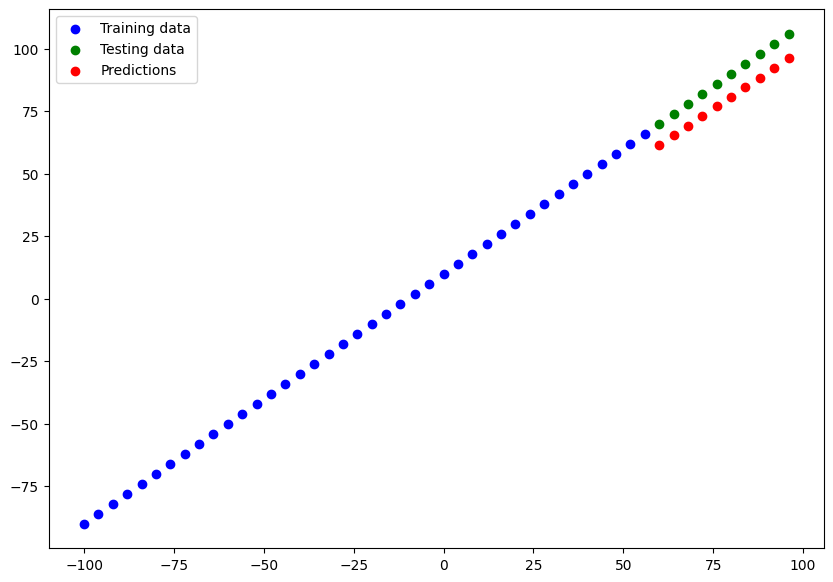

In [27]:
# Make and plot predictions for model_6
y_preds_6 = model_6.predict(X_test)
plot_predictions(predictions=y_preds_6)

In [28]:
# Calculate model_6 metrics
mae_6 = mae(y_test, y_preds_6.squeeze()).numpy()
mse_6 = mse(y_test, y_preds_6.squeeze()).numpy()
mae_6, mse_6

(9.099238, 83.01249)

In [29]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(50), # 50 units
  tf.keras.layers.Dense(30), #30 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), # Adam works but SGD doesn't 
                          metrics=['mse'])

# Fit the model and save the history (we can plot this)
model_7.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 137ms/step


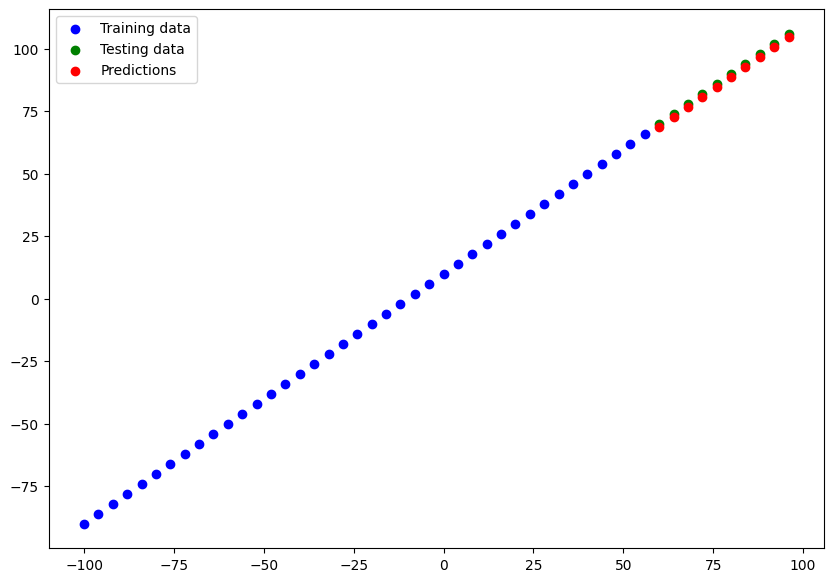

In [30]:
y_preds_7 = model_7.predict(X_test)
plot_predictions(predictions=y_preds_7)

In [31]:
y_preds_7

array([[ 68.89882],
       [ 72.87771],
       [ 76.85662],
       [ 80.83551],
       [ 84.81439],
       [ 88.79328],
       [ 92.77219],
       [ 96.75107],
       [100.72998],
       [104.70883]], dtype=float32)

In [32]:
mae_7 = mae(y_test, y_preds_7.squeeze()).numpy()
mse_7 = mse(y_test, y_preds_7.squeeze()).numpy()
mae_7, mse_7

(1.1961601, 1.434475)

In [33]:
model_7.predict(X_test) # 70,  74,  78,  82,  86,  90,  94,  98, 102, 106

1/1 [==============================] - 0s 26ms/step


array([[ 68.89882],
       [ 72.87771],
       [ 76.85662],
       [ 80.83551],
       [ 84.81439],
       [ 88.79328],
       [ 92.77219],
       [ 96.75107],
       [100.72998],
       [104.70883]], dtype=float32)

**Comparing results**

In [34]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],
                 ["model_4", mae_4, mse_4],
                 ["model_5", mae_5, mse_5],
                 ["model_6", mae_6, mse_6],
                 ["model_7", mae_7, mse_7]]

In [35]:
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.356313,76.147186
1,model_2,10.820669,124.969154
2,model_3,68.600449,4792.254883
3,model_4,12.485459,156.711578
4,model_5,11.612066,135.255203
5,model_6,9.099238,83.012489
6,model_7,1.196160,1.434475


## Saving a model

**There are two ways to save a model in TensorFlow:** 

**1.The SavedModel format (default).**
**2.The HDF5 format.**

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [36]:
# Save a model using the SavedModel format
model_6.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [37]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
# Save a model using the HDF5 format
model_6.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [39]:
# Check it out
!ls best_model_HDF5_format.h5

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Loading a model

We can load a saved model using the load_model()method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [40]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,771
Trainable params: 5,771
Non-trainable params: 0
_________________________________________________________________


## Now let's test it out.

In [41]:
# Compare model_2 with the SavedModel version (should return True)
model_6_preds = model_6.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_6_preds.squeeze()).numpy()

1/1 [==============================] - 0s 232ms/step


True

In [42]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,771
Trainable params: 5,771
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_6_preds.squeeze()).numpy()

1/1 [==============================] - 0s 216ms/step


True

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [44]:
# Download the model (or any file) from Google Colab
files.download("best_model_HDF5_format.h5")

NameError: name 'files' is not defined